# Análisis de Componentes Principales con H2O

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

### Comprensión del negocio 

Objetivo del negocio: Identificar departamentos del Perú con características similares.

Objetivo de machine learning: Aplicar un modelo de análisis de componentes principales para segmentar los departamentos del Perú.

### Comprensión de los datos 

In [2]:
! pip install h2o

In [3]:
import h2o

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 22.0.1+8-16, mixed mode, sharing)
  Starting server from C:\Users\HP\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HP\AppData\Local\Temp\tmpdezg4121
  JVM stdout: C:\Users\HP\AppData\Local\Temp\tmpdezg4121\h2o_HP_started_from_python.out
  JVM stderr: C:\Users\HP\AppData\Local\Temp\tmpdezg4121\h2o_HP_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 year and 5 days
H2O_cluster_name:,H2O_from_python_HP_2615su
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.922 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [106]:
#Carga de datos en el cluster H2O
data_h2o = h2o.import_file(
                path   = "D:/Bases/Otros/pea_peru.csv",
                header = 1,
                sep    = ",",
                destination_frame = "datos_h2o"
            )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [107]:
data_h2o.head()

departamento,X1,X2,X3,X4,X8,X18,X20
Amazonas,290,1,2571,1737,1623,181,76285
Ancash,9018,3,6920,9904,15625,4937,102156
Apurímac,3049,2,1779,1431,1808,2062,54696
Arequipa,11243,0,13390,17503,28868,18404,76675
Ayacucho,7143,2,2639,3134,4166,4963,87986
Cajamarca,15355,6,9930,7112,7346,6572,242243
Callao,14730,22,12728,18562,37432,1163,3041
Cusco,13461,8,7633,9197,14619,2900,157743
Huancavelica,3004,2,993,1147,1527,4389,82900
Huánuco,5648,2,5174,3719,4339,2040,126288


In [7]:
data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].describe()

Rows:25
Cols:7

,X1,X2,X3,X4,X8,X18,X20
type,int,int,int,int,int,int,int
mins,290.0,0.0,985.0,1147.0,1382.0,85.0,3041.0
mean,13830.32,22.68,12738.200000000003,13409.999999999998,24667.48,5348.24,93699.72000000002
maxs,152282.0,457.0,161532.0,171936.0,358287.0,21132.0,242243.0
sigma,29203.17596272707,90.63880699420824,31354.061210896856,33455.14074971638,70179.65753283972,5836.350152849524,64864.084530989356
zeros,0,4,0,0,0,0,0
missing,0,0,0,0,0,0,0
0,290.0,1.0,2571.0,1737.0,1623.0,181.0,76285.0
1,9018.0,3.0,6920.0,9904.0,15625.0,4937.0,102156.0
2,3049.0,2.0,1779.0,1431.0,1808.0,2062.0,54696.0


In [46]:
#data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].apply(lambda x: x.mean(), axis=0)

In [47]:
#data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].apply(lambda x: x.sd(), axis=0)

In [54]:
Variables = h2o.H2OFrame(['X1','X2','X3','X4','X8','X18','X20'])
Variables.set_names(['Variables'])

Media = h2o.H2OFrame(data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].mean())
Media.set_names(['Media'])

Desviacion_Estandar = h2o.H2OFrame(data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].sd())
Desviacion_Estandar.set_names(['Desviacion_Estandar'])

Indicadores = Variables[:, ['Variables']].cbind(Media[:, ['Media']])
Indicadores = Indicadores.cbind(Desviacion_Estandar[:, ['Desviacion_Estandar']])
Indicadores

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Variables,Media,Desviacion_Estandar
X1,13830.3,29203.2
X2,22.68,90.6388
X3,12738.2,31354.1
X4,13410,33455.1
X8,24667.5,70179.7
X18,5348.24,5836.35
X20,93699.7,64864.1


Se deben de estandarizar las variables para que tengan media cero y desviación estándar uno antes de aplicar Análisis de Componentes Principales, pues las variables X8 y X20 tienen una media y dispersión muy superior al resto. Esta estandarización evita que las variables X8 y X20 dominen la mayoría de las componentes principales.

In [ ]:
#Prueba de normalidad
#Ho: la variable se aproxima a una distribución normal
#Ha: la variable no se aproxima a una distribución normal

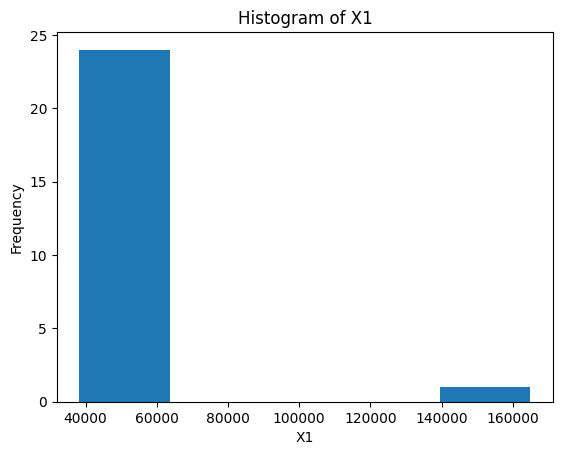

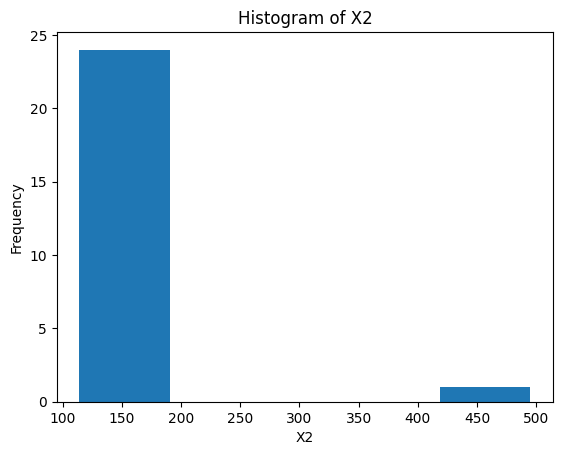

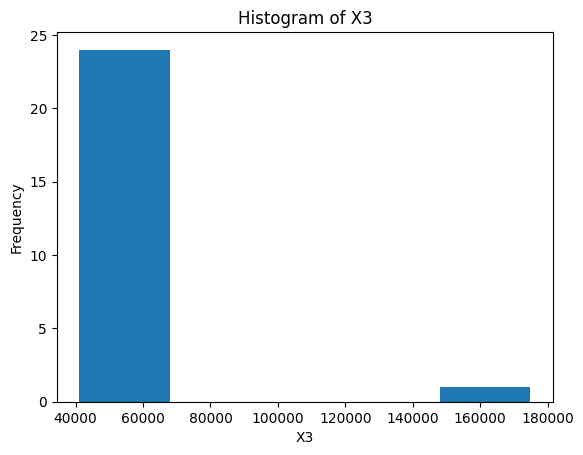

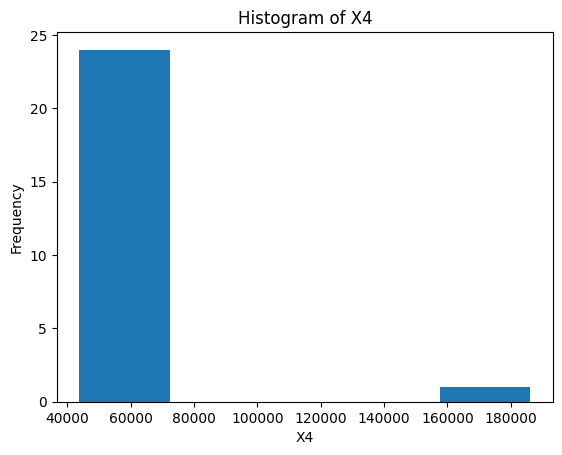

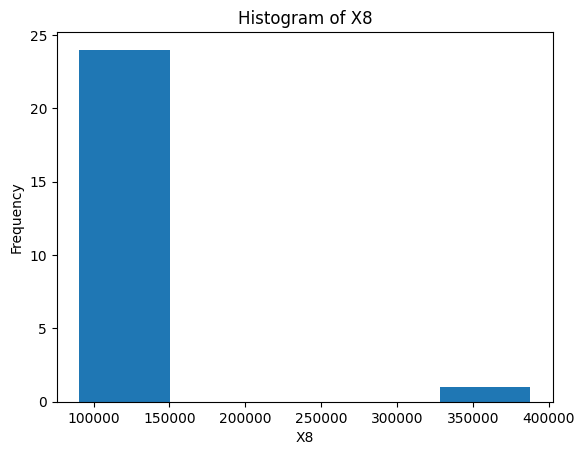

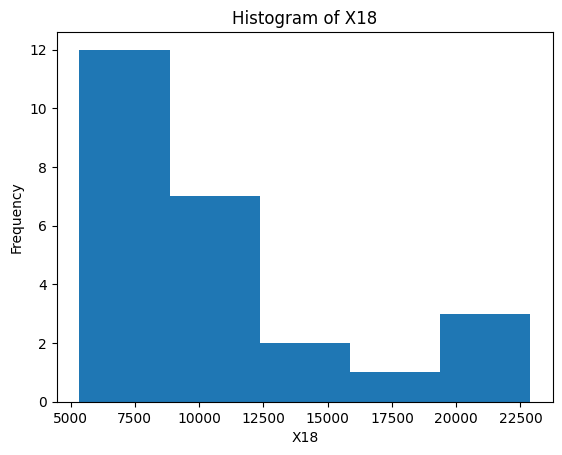

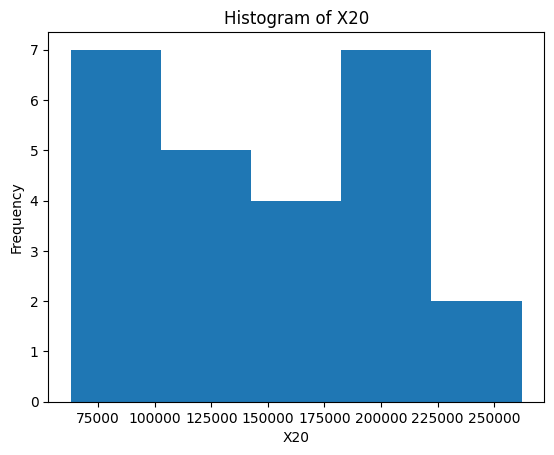

In [68]:
for col in data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].columns:
    data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']][col].hist()

In [76]:
#Tarea
#Realizar las pruebas de normalidad para cada una de las variables.

In [56]:
import matplotlib.pyplot as plt

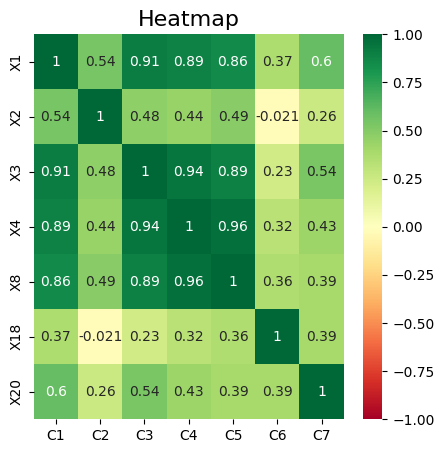

In [59]:
plt.figure(figsize=(5,5))
corr = data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].cor(method='Spearman').as_data_frame()
corr.index = data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Heatmap", fontsize=16)
plt.show()

In [55]:
data_h2o_cor = data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']].cor(method='Spearman')
data_h2o_cor.set_names(['X1','X2','X3','X4','X8','X18','X20'])

X1,X2,X3,X4,X8,X18,X20
1,0.544033,0.912308,0.885385,0.858462,0.374615,0.600769
0.544033,1,0.475231,0.444731,0.485162,-0.0205697,0.256767
0.912308,0.475231,1,0.94,0.893077,0.228462,0.536154
0.885385,0.444731,0.94,1,0.963077,0.321538,0.428462
0.858462,0.485162,0.893077,0.963077,1,0.363846,0.391538
0.374615,-0.0205697,0.228462,0.321538,0.363846,1,0.391538
0.600769,0.256767,0.536154,0.428462,0.391538,0.391538,1


In [15]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [ ]:
#Tarea
#Realizar las pruebas de correlación para las variables.

In [85]:
#Prueba de esferecidad de Barlett
#Ho: Las variables no están correlacionadas
#Ha: Las variables están correlacionadas

In [86]:
import scipy.stats as ss

In [89]:
ss.bartlett(h2o.as_list(data_h2o['X1']),
            h2o.as_list(data_h2o['X2']),
            h2o.as_list(data_h2o['X3']),
            h2o.as_list(data_h2o['X4']),
            h2o.as_list(data_h2o['X8']),
            h2o.as_list(data_h2o['X18']),
            h2o.as_list(data_h2o['X20']))

BartlettResult(statistic=array([377.17557216]), pvalue=array([2.24888863e-78]))

### Preparación de los datos 

In [90]:
data_h2o.head()

﻿departamento,X1,X2,X3,X4,X8,X18,X20
Amazonas,290,1,2571,1737,1623,181,76285
Ancash,9018,3,6920,9904,15625,4937,102156
Apurímac,3049,2,1779,1431,1808,2062,54696
Arequipa,11243,0,13390,17503,28868,18404,76675
Ayacucho,7143,2,2639,3134,4166,4963,87986
Cajamarca,15355,6,9930,7112,7346,6572,242243
Callao,14730,22,12728,18562,37432,1163,3041
Cusco,13461,8,7633,9197,14619,2900,157743
Huancavelica,3004,2,993,1147,1527,4389,82900
Huánuco,5648,2,5174,3719,4339,2040,126288


In [91]:
data_h2o_scaled = data_h2o.scale(center=True, scale=True)

In [92]:
data_h2o_scaled.head()

﻿departamento,X1,X2,X3,X4,X8,X18,X20
Amazonas,-0.463659,-0.239191,-0.324271,-0.348915,-0.328364,-0.885355,-0.26848
Ancash,-0.164788,-0.217126,-0.185564,-0.104797,-0.128848,-0.0704618,0.130369
Apurímac,-0.369183,-0.228158,-0.34953,-0.358062,-0.325728,-0.563064,-0.601315
Arequipa,-0.0885972,-0.250224,0.0207884,0.122343,0.0598538,2.23697,-0.262468
Ayacucho,-0.228993,-0.228158,-0.322102,-0.307158,-0.292129,-0.066007,-0.0880876
Cajamarca,0.0522094,-0.184027,-0.0895642,-0.188252,-0.246816,0.209679,2.29007
Callao,0.0308076,-0.00750231,-0.000325317,0.153997,0.181883,-0.717099,-1.39767
Cusco,-0.0126466,-0.161962,-0.162824,-0.12593,-0.143182,-0.419481,0.987346
Huancavelica,-0.370724,-0.228158,-0.374599,-0.366551,-0.329732,-0.164356,-0.166498
Huánuco,-0.280186,-0.228158,-0.241251,-0.289671,-0.289663,-0.566834,0.502409


### Modelado

In [93]:
from h2o.estimators import H2OPrincipalComponentAnalysisEstimator

In [94]:
pea_pca = H2OPrincipalComponentAnalysisEstimator(k = 7,
                                                 use_all_factor_levels = True,
                                                 pca_method = "glrm",
                                                 transform = "standardize",
                                                 impute_missing = True)

In [95]:
pea_pca.train(training_frame = data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']])

pca Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OPrincipalComponentAnalysisEstimator : Principal Components Analysis
Model Key: PCA_model_python_1714834838149_1


Importance of components: 
                        pc1       pc2       pc3        pc4         pc5          pc6          pc7
----------------------  --------  --------  ---------  ----------  -----------  -----------  -----------
Standard deviation      2.33039   1.03878   0.687954   0.10899     0.050965     0.0476327    0.0140119
Proportion of Variance  0.775818  0.154151  0.0676116  0.00169697  0.000371061  0.000324126  2.80475e-05
Cumulative Proportion   0.775818  0.929968  0.99758    0.999277    0.999648     0.999972     1

ModelMetricsPCA: pca
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): None
Misclassification Error (Categorical): None

Scoring history from GLRM: 
    timestamp            duration    iterations    step_size    objective
--  -------------------  ----------  ------------  -----------  -----------
    2024-05-04 11:20:20  0.252 sec   0             0.666667     5.53926e-30
    2024-05-04 11:20:20  0.253 sec   1             0.444444     5.53926e-30
    2024-05-04 11:20:20  0.258 sec   2             0.466667     2.73886e-30
    2024-05-04 11:20:20  0.259 sec   3             0.311111     2.73886e-30
    2024-05-04 11:20:20  0.263 sec   4             0.326667     7.51361e-31
    2024-05-04 11:20:20  0.266 sec   5             0.343        5.08358e-31
    2024-05-04 11:20:20  0.267 sec   6             0.228667     5.08358e-31
    2024-05-04 11:20:20  0.269 sec   7             0.2401       4.9119e-31
    2024-05-04 11:20:20  0.271 sec   8             0.252105     4.68363e-31
    2024-05-04 11:20:20  0.272 sec   9             0.16807      4.68363e-31
    2024-05-04 11:20:20  0.275 sec   10            0.176474     4.622e-31
    2024-05-04 11:20:20  0.276 sec   11            0.117649     4.622e-31
    2024-05-04 11:20:20  0.279 sec   12            0.0784327    4.622e-31
    2024-05-04 11:20:20  0.281 sec   13            0.0522884    4.622e-31
    2024-05-04 11:20:20  0.283 sec   14            0.0261442    4.622e-31
    2024-05-04 11:20:20  0.285 sec   15            0.00871474   4.622e-31
    2024-05-04 11:20:20  0.288 sec   16            0.00217869   4.622e-31
    2024-05-04 11:20:20  0.289 sec   17            0.000435737  4.622e-31
    2024-05-04 11:20:20  0.290 sec   18            7.26228e-05  4.622e-31

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

### Evaluación 

In [96]:
pea_pca.summary()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
Standard deviation,2.3303913,1.0387751,0.6879544,0.1089898,0.0509650,0.0476327,0.0140119
Proportion of Variance,0.7758177,0.1541505,0.0676116,0.0016970,0.0003711,0.0003241,0.0000280
Cumulative Proportion,0.7758177,0.9299682,0.9975798,0.9992768,0.9996478,0.9999720,1.0


In [98]:
componentes = pea_pca.predict(data_h2o[:, ['X1','X2','X3','X4','X8','X18','X20']])

pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [99]:
componentes.head()

PC1,PC2,PC3,PC4,PC5,PC6,PC7
-1.01365,0.434837,0.473977,-0.0518599,0.10407,0.0895798,0.00919252
-0.345922,-0.169864,0.0399445,0.0626885,0.053164,-0.0367725,0.00760961
-0.925302,0.598776,0.0554647,-0.0726377,0.0108615,0.0162289,-0.000474232
0.568866,-0.715884,-2.07255,0.174814,0.000300484,0.0109494,0.0124603
-0.614855,-0.0370655,-0.109505,-0.0688769,-0.0382454,-0.0491212,-0.00366165
0.0399366,-2.17812,0.82209,-0.0471118,-0.0697627,-0.0242775,0.0059784
-0.214036,1.56201,-0.00174921,0.166789,0.0572474,-0.0913934,-0.0192229
-0.269362,-0.762245,0.760922,0.0135618,0.00762435,-0.0850098,-0.00594824
-0.77643,0.0486,-0.0916788,-0.114074,0.0309418,0.00576714,-0.00439315
-0.674092,-0.342958,0.594652,-0.0335484,0.0397559,0.0441563,0.00213533


### Implementación

In [108]:
data_h2o.columns

['departamento', 'X1', 'X2', 'X3', 'X4', 'X8', 'X18', 'X20']

In [109]:
dataf = data_h2o[:, ['departamento']].cbind(componentes[:, ['PC1','PC2']])

In [110]:
dataf.head()

departamento,PC1,PC2
Amazonas,-1.01365,0.434837
Ancash,-0.345922,-0.169864
Apurímac,-0.925302,0.598776
Arequipa,0.568866,-0.715884
Ayacucho,-0.614855,-0.0370655
Cajamarca,0.0399366,-2.17812
Callao,-0.214036,1.56201
Cusco,-0.269362,-0.762245
Huancavelica,-0.77643,0.0486
Huánuco,-0.674092,-0.342958


In [111]:
ss.spearmanr(h2o.as_list(dataf['PC1']),h2o.as_list(dataf['PC2']))

SignificanceResult(statistic=-0.6346153846153846, pvalue=0.0006558697777217728)

In [113]:
h2o.download_csv(dataf,"D:/dataf.csv")

'D:\\dataf.csv'